In [1]:
import pandas as pd
import json
import os
from PIL import Image
import numpy as np

In [2]:
#read json file
with open('/home/arthur/tail/AudioGuIA/ModelAudioGuIA/results/test_results_20250417_160842.json') as f:
    data = json.load(f)

Movie: 1042_Up_In_The_Air
Descrição real: someone reads someone's name badge.
Descrição prevista: someone looks at her.


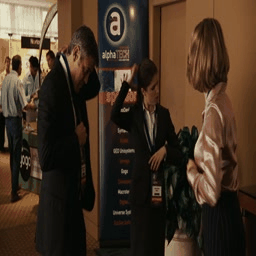

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display

jpg_root = '/mnt/e/Movies/img/'
num_clipes = len(data)
random_index = np.random.randint(0, num_clipes)

movie =data[random_index]['frames_path'].split('/')[0]
clipe = os.path.join(jpg_root, '/'.join(data[random_index]['frames_path'].split('/')[:-1]))
pred_description = data[random_index]['predicted_description']
real_description = data[random_index]['true_description']
if os.path.exists(os.path.join(clipe, 'output.gif')):
  pass
else:
  image_files = sorted([
      os.path.join(clipe, f)
      for f in os.listdir(clipe)
      if f.endswith('.jpg') or f.endswith('.png')
  ])

  frames = [Image.open(img_path) for img_path in image_files]

  gif_path = os.path.join(clipe, 'output.gif')
  frames[0].save(
      gif_path,
      save_all=True,
      append_images=frames[1:], 
      duration=100,
      loop=0
  )

# Exibe no notebook
print("Movie:", movie)
print("Descrição real:", real_description)
print("Descrição prevista:", pred_description)
display(IPyImage(filename=gif_path))
